In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
airlines= pd.read_excel("C:/Users/khann/OneDrive/Desktop/excel r assignments/EastWestAirlines.xlsx")

In [3]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airlines.iloc[:,1:])

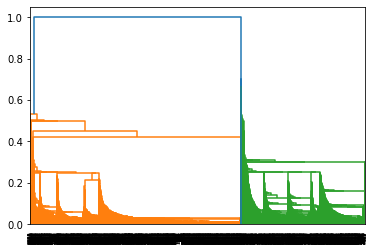

In [6]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [7]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [8]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [9]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [10]:
### K-Means Clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

<AxesSubplot:xlabel='X', ylabel='Y'>

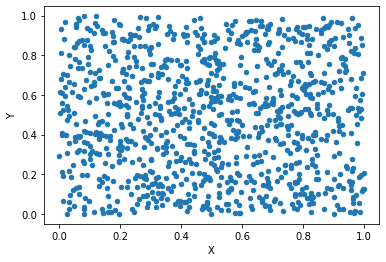

In [11]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [12]:
X = np.random.uniform(0,1,1000)
X

array([2.23660812e-01, 1.09494214e-01, 1.94940760e-01, 5.71858845e-01,
       6.83077170e-01, 3.69506682e-01, 6.61867020e-01, 8.20740719e-01,
       9.65180063e-01, 7.41537445e-01, 2.33099673e-01, 9.99526171e-02,
       9.23353172e-01, 5.59573061e-01, 3.88347054e-01, 1.56375832e-02,
       1.60116927e-01, 5.86462925e-01, 6.03701414e-01, 3.55533887e-01,
       6.08280250e-01, 9.14371720e-01, 7.95590777e-01, 2.53553488e-01,
       1.61779490e-01, 4.47998303e-01, 5.33707304e-01, 1.04448872e-02,
       9.82642132e-01, 9.18115035e-01, 2.19454562e-01, 4.07072004e-01,
       6.03671660e-01, 7.31853674e-01, 9.54596900e-01, 7.27148716e-01,
       5.17258091e-01, 1.56264273e-01, 6.68748789e-01, 2.77877076e-01,
       4.00101691e-01, 7.06189949e-01, 8.43316130e-01, 5.57869821e-01,
       8.45820258e-01, 6.61380434e-01, 3.93655453e-01, 3.41541279e-01,
       7.59800202e-01, 9.11970392e-02, 7.56173822e-01, 1.82808142e-01,
       1.70648876e-01, 9.66778419e-01, 1.56074445e-01, 8.50446745e-01,
      

<AxesSubplot:xlabel='X', ylabel='Y'>

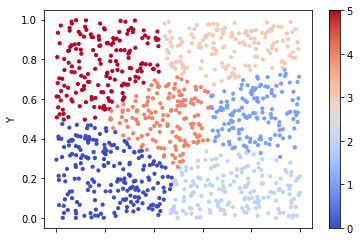

In [13]:
model1 = KMeans(n_clusters=6).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [14]:
model=KMeans(n_clusters=6) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row

array([0, 0, 0, ..., 2, 3, 3])

In [15]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
airlines['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [16]:
airlines.iloc[:,1:7].groupby(airlines.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust,,,,,,
0,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885
1,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204
2,70100.761021,165.721578,3.480278,1.000000,1.002320,30683.315545
3,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349
4,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245
5,152008.013263,235.623342,4.413793,1.002653,1.053050,62673.989390


In [17]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,5


In [18]:
### DBSCAN CLUSTERING

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [19]:
array=df_norm
array

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [20]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [21]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [22]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [24]:
pd.concat([array,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,1
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0
